# Online Payment Fraud Detection

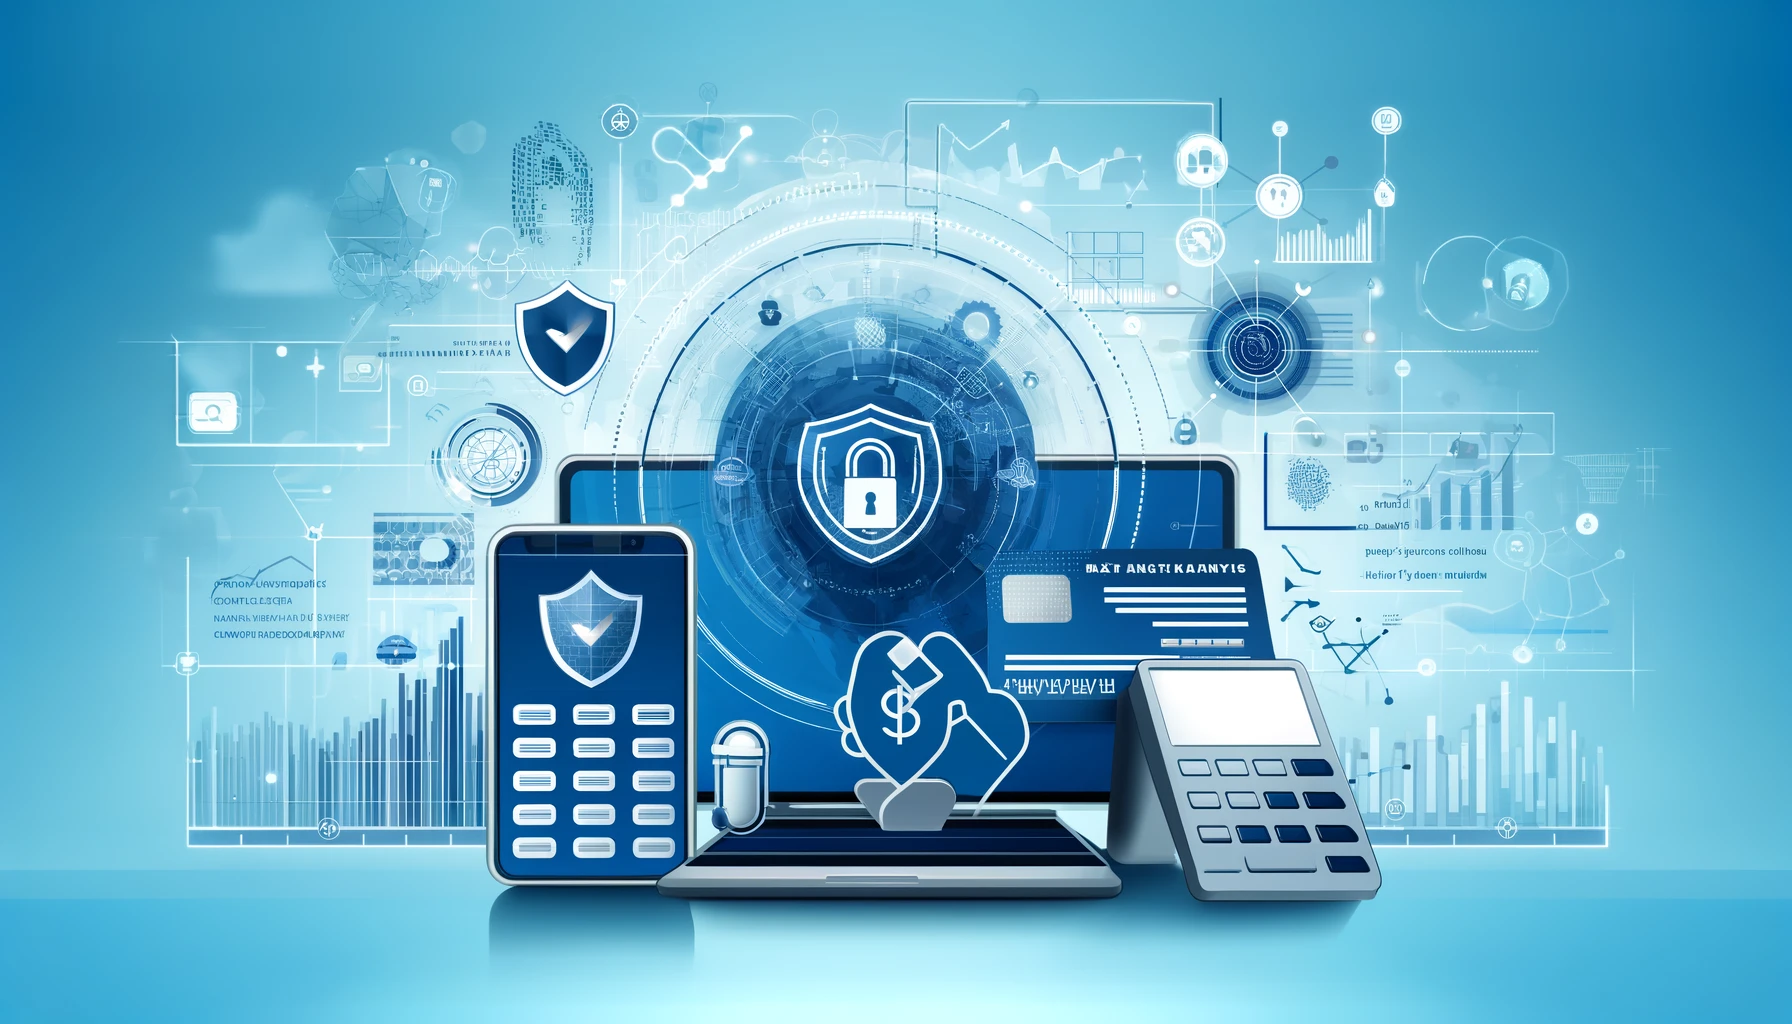

**Masoud Fattahi Bandpey**             June 2024

## Introduction

Online payment is the most popular transaction method in the world today. However, with an increase in online payments also comes a rise in payment fraud. The objective of this study is to identify fraudulent and non-fraudulent payments. The dataset is collected from Kaggle, which contains historical information about fraudulent transactions that can be used to detect fraud in online payments.

The dataset consists of 10 variables:
- **step:** represents a unit of time where 1 step equals 1 hour
- **type:** type of online transaction
- **amount:** the amount of the transaction
- **nameOrig:** customer starting the transaction
- **oldbalanceOrg:** balance before the transaction
- **newbalanceOrig:** balance after the transaction
- **nameDest:** recipient of the transaction
- **oldbalanceDest:** initial balance of recipient before the transaction
- **newbalanceDest:** the new balance of recipient after the transaction
- **isFraud:** fraud transaction indicator

## Methodology

The goal of this project is to develop a model capable of detecting fraudulent transactions in online payment systems. The methodology consists of several key steps, detailed below:

### Data Collection and Preprocessing
- **Data Collection**: The dataset used in this project is sourced from Kaggle, containing historical transaction data labeled as fraudulent or non-fraudulent.
- **Data Cleaning**: Handling missing values, duplicates, and irrelevant features. In our dataset, we drop the 'isFlaggedFraud' column as it is not useful for our analysis.
- **Data Transformation**: Converting categorical variables into numerical values and downcasting numerical columns to optimize memory usage.

### Exploratory Data Analysis (EDA)
- **Univariate Analysis**: Analyzing individual features to understand their distribution and identify any patterns or anomalies.
- **Bivariate Analysis**: Exploring relationships between pairs of variables to uncover potential correlations and interactions.
- **Multivariate Analysis**: Examining the combined influence of multiple features on the target variable to detect complex relationships.

### Feature Engineering
- Creating new features from existing ones to better capture the underlying patterns in the data.
- Binning continuous variables into categorical bins to simplify the model's learning process and reduce overfitting.

### Model Building and Evaluation
- **Model Selection**: Choosing appropriate machine learning algorithms. In this project, we use Random Forest and Logistic Regression models due to their ability to handle imbalanced datasets effectively.
- **Data Splitting**: Dividing the dataset into training and testing sets using stratified k-fold cross-validation to ensure the model's performance is robust and generalizable.
- **Model Training**: Training the selected models on the training data while addressing class imbalance using techniques like Random UnderSampling.
- **Model Evaluation**: Assessing model performance using various metrics such as accuracy, precision, recall, F1-score, and AUC-ROC curve.

### Hyperparameter Tuning
- Fine-tuning the model's hyperparameters to optimize performance and prevent overfitting.

### Model Interpretation and Insights
- Analyzing the model's predictions to gain insights into the factors contributing to fraudulent transactions.
- Visualizing the model's performance and the importance of different features.

### Conclusion and Future Work
- Summarizing the findings and performance of the model.
- Discussing potential improvements and future directions for the project.


## 1. Data Collection and Preprocessing

### Data Collection
The dataset used in this project is sourced from Kaggle, containing historical transaction data labeled as fraudulent or non-fraudulent.

### Importing Libraries
We start by importing all the necessary libraries for data manipulation, visualization, and machine learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
#import tensorflow as tf

### Loading the Dataset

Next, we load the dataset from the specified path and examine its structure and basic statistics.

- **Loading the data**: We load the CSV file containing the transaction data into a Pandas DataFrame.
- **Dropping unnecessary columns**: We drop the `isFlaggedFraud` column as it is not needed for our analysis.
- **Inspecting the data**: The `info()` method provides an overview of the dataset, including the number of entries, column names, data types, and memory tents.
ents.

In [5]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.drop('isFlaggedFraud', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


- **Viewing the first few rows**: The `head()` method is used to display the first 5 rows of the dataset to get an initial understanding of its structure and contents.

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


### Checking for Missing Values

We check for any missing values in the dataset.

- **Checking for missing values**: The `isnull().sum()` method is used to count the number of missing values in each colulity.


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

- **Dropping rows with missing values**: The `dropna()` method removes all rows that contain any missing values to ensure data quality.

In [11]:
df = df.dropna(axis=0)

### Descriptive Statistics

We calculate the minimum and maximum values for key numerical features to understand their range.

- **Calculating min and max values**: We create a dictionary containing the column names and their respective minimum and maximum values. This dictionary is then converted into a Pandas DataFrame for better readability and printed in a tabular format.


In [13]:
fraud_min_max = {
    'columns': ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'isFraud'],
    'min value': [
        df['amount'].min(), 
        df['oldbalanceOrg'].min(), 
        df['newbalanceOrig'].min(), 
        df['oldbalanceDest'].min(), 
        df['isFraud'].min()
    ],
    'max value': [
        df['amount'].max(), 
        df['oldbalanceOrg'].max(), 
        df['newbalanceOrig'].max(), 
        df['oldbalanceDest'].max(), 
        df['isFraud'].max()
    ]
}

fraud_min_max_df = pd.DataFrame(fraud_min_max)

# Print the DataFrame in a tabular format
print(fraud_min_max_df)


          columns  min value    max value
0          amount       2.39  10000000.00
1   oldbalanceOrg       0.00  12930418.44
2  newbalanceOrig       0.00  13010502.78
3  oldbalanceDest       0.00  20937587.49
4         isFraud       0.00         1.00


### Optimizing Memory Usage

We downcast numerical columns to smaller data types to optimize memory usage.

- **Downcasting numerical columns**: We iterate over the columns and downcast `float64` columns to `float32` and `int64` columns to `uint32` or smaller. This helps in reducing the memory footprint of the dataset.
- **Converting categorical columns**: We convert the `type` column to a categorical data type, which also helps in reducing memory usage.


In [15]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')
df['type'] = df['type'].astype('category')


### Checking for Duplicate Values

Finally, we check if there are any duplicate rows in the dataset.

- **Checking for duplicates**: The `duplicated().sum()` method counts the number of duplicate rows in the dataset. In this case, no duplicate values were found.


In [17]:
df.duplicated().sum()

0

## 2. Exploratory Data Analysis (EDA)

In this section, we will perform exploratory data analysis to understand the structure, distribution, and relationships within the datasef.sample(5)


### Univariate Analysis

We analyze individual features to understand their distribution and identify any patterns or anomalies.

- **Value counts for `step`**: The `value_counts()` method counts the occurrences of each unique value in the `step` column.


In [20]:
df['step'].value_counts()

step
7    6837
1    2708
6    1660
2    1014
5     665
4     565
3     552
8     245
Name: count, dtype: int64

- **Plotting the count of transaction types**: The `countplot()` function from Seaborn is used to create a bar plot showing the count of each transaction type.


/tmp/ipykernel_4490/442016001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of transactions')

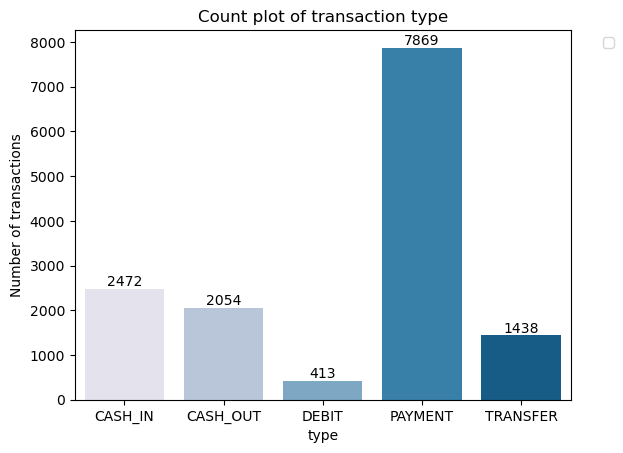

In [22]:
#sns.set_style('whitegrid')
#plt.rcParams['figure.figsize'] = (8, 6)
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of transactions')


- **Plotting the distribution of transaction amounts**: The `kdeplot()` function from Seaborn is used to create a kernel density estimate plot showing the distribution of the `amount` column.


Text(0.5, 1.0, 'Distribution of transaction amount')

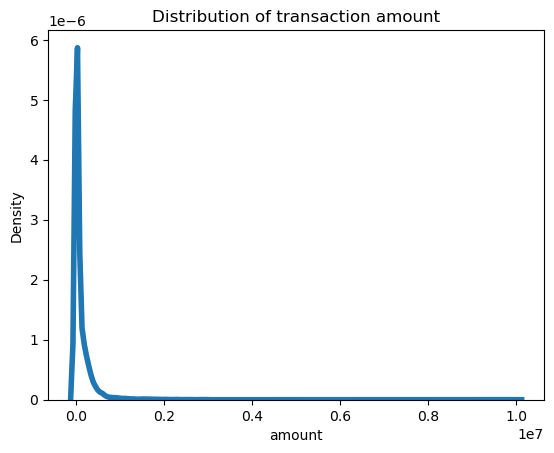

In [24]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')


### Bivariate Analysis

We explore relationships between pairs of variables to uncover potential correlations and interactions.

- **Count plot of transaction type by fraud status**: We use the `countplot()` function with the `hue` parameter to visualize the count of each transaction type, separated by fraud status.


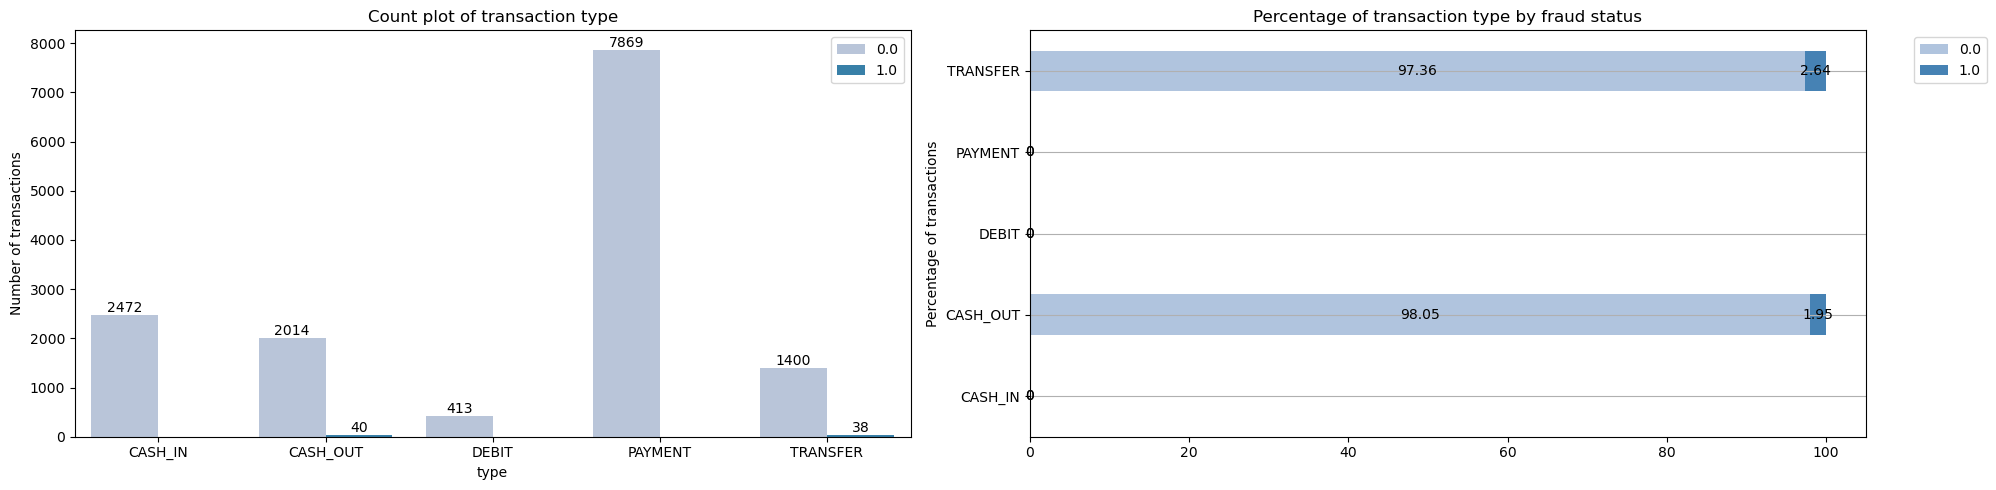

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# First subplot: Count plot of transaction type
sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

# Second subplot: Percentage of transaction type by fraud status
df2 = df.groupby(['type', 'isFraud'], observed=True).size().unstack()
df2_percentage = df2.apply(lambda x: round(x / sum(x) * 100, 2), axis=1)

df2_percentage.plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Percentage of transaction type by fraud status')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_ylabel('Percentage of transactions')
ax[1].grid(axis='y')

# Show the plots
plt.tight_layout()
plt.show()


### Multivariate Analysis

We examine the combined influence of multiple features on the target variable to detect complex relationships.

- **Correlation matrix heatmap**: We calculate the Spearman correlation matrix and use the `heatmap()` function from Seaborn to visualize the correlations between features.


Text(0.5, 1.0, 'Correlation')

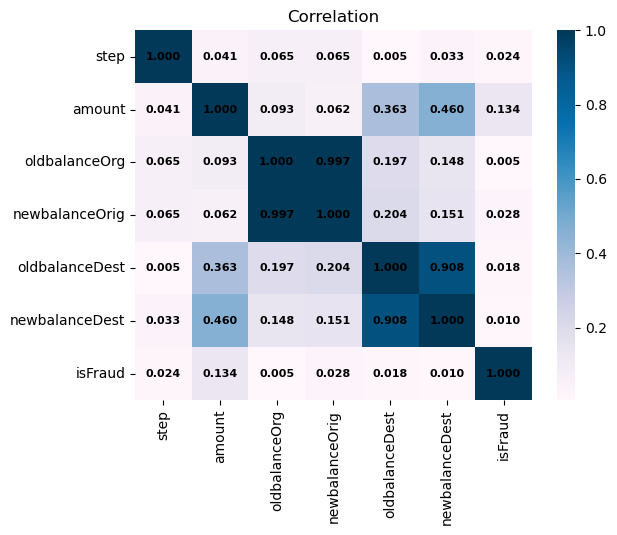

In [28]:
corr_matrix = df.corr(numeric_only=True).abs()
sns.heatmap(corr_matrix, cbar=True, annot=True, fmt='.3f', cmap='PuBu', annot_kws={"size": 8, "color": "black", "weight": "bold"})
plt.title('Correlation')

### Distribution Analysis for Key Features
*: The `kdeplot()` function from Seaborn is used to create a kernel density estimate plot showing the distribution of the `oldbalanceO,newbalanceOrig,oldbalanceDest,newbalanceDestrg` colusmn.


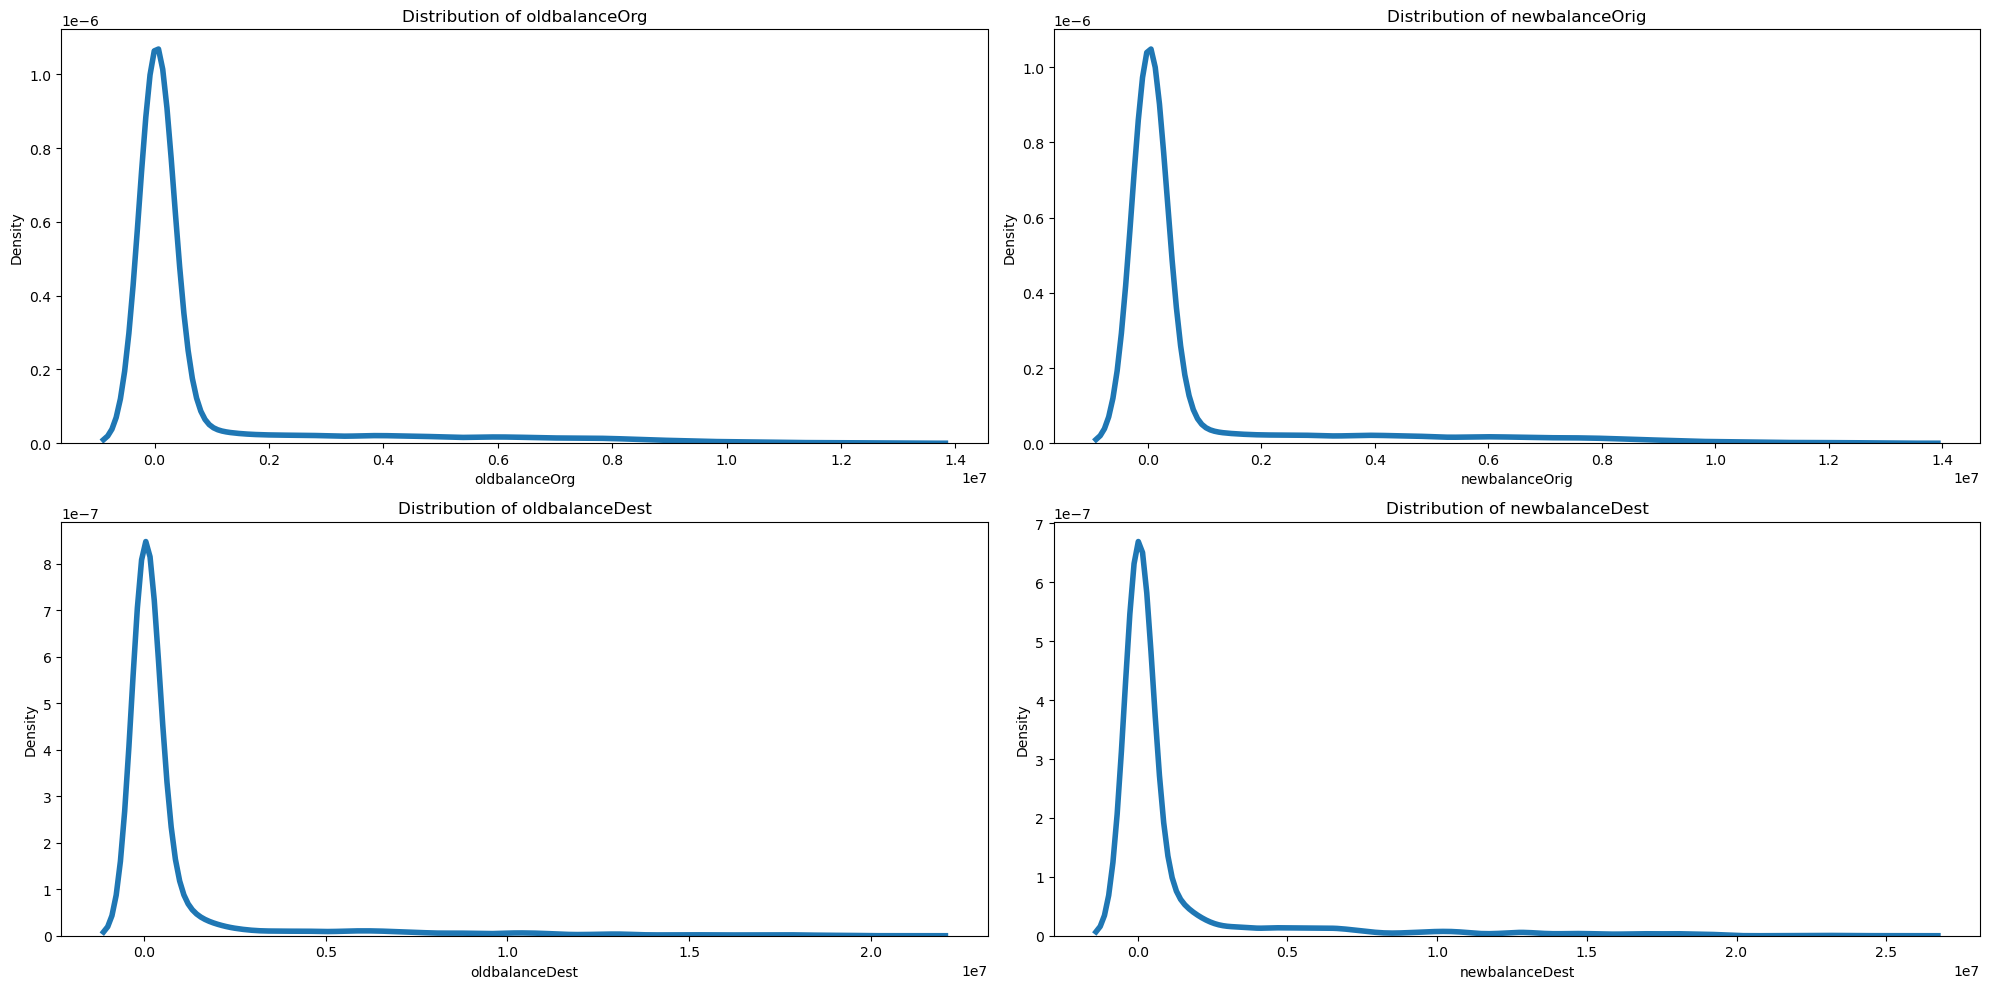

In [30]:
# Create a figure with subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# First subplot: Distribution of oldbalanceOrg
sns.kdeplot(df['oldbalanceOrg'], linewidth=4, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of oldbalanceOrg')

# Second subplot: Distribution of newbalanceOrig
sns.kdeplot(df['newbalanceOrig'], linewidth=4, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of newbalanceOrig')

# Third subplot: Distribution of oldbalanceDest
sns.kdeplot(df['oldbalanceDest'], linewidth=4, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of oldbalanceDest')

# Fourth subplot: Distribution of newbalanceDest
sns.kdeplot(df['newbalanceDest'], linewidth=4, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of newbalanceDest')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


these plots indicate that the majority of transactions involve accounts with balances near zero both before and after transactions. This could suggest a pattern where many transactions are of small amounts or that the dataset includes many transactions with accounts that do not maintain large balances.


### Fraud Analysis


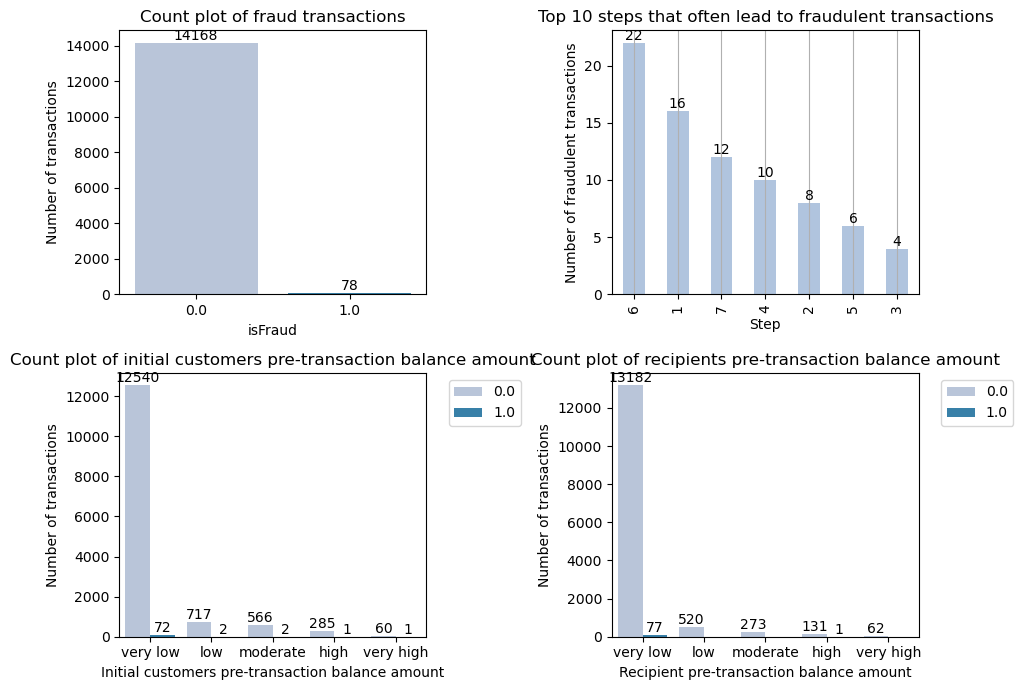

In [33]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10,7))

# First subplot: Count plot of fraud transactions
ax1 = sns.countplot(x='isFraud', data=df, palette='PuBu', ax=axs[0, 0], hue='isFraud', legend=False)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Count plot of fraud transactions')
ax1.set_ylabel('Number of transactions')

# Second subplot: Top 10 steps that often lead to fraudulent transactions
df1 = df[df['isFraud'] == 1]
df2 = df1['step'].value_counts().head(10)
ax2 = df2.plot(kind='bar', color='lightsteelblue', ax=axs[0, 1])
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_title('Top 10 steps that often lead to fraudulent transactions')
ax2.set_ylabel('Number of fraudulent transactions')
ax2.set_xlabel('Step')
ax2.grid(axis='x')

# Third subplot: Count plot of initial customers pre-transaction balance amount
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])
ax3 = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu', ax=axs[1, 0])
for container in ax3.containers:
    ax3.bar_label(container)
ax3.set_title('Count plot of initial customers pre-transaction balance amount')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.set_ylabel('Number of transactions')
ax3.set_xlabel('Initial customers pre-transaction balance amount')

# Fourth subplot: Count plot of recipients pre-transaction balance amount
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])
ax4 = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu', ax=axs[1, 1])
for container in ax4.containers:
    ax4.bar_label(container)
ax4.set_title('Count plot of recipients pre-transaction balance amount')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.set_ylabel('Number of transactions')
ax4.set_xlabel('Recipient pre-transaction balance amount')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


From the plots, we can derive the following key insights:

1. **Fraud Prevalence**:
    - Fraudulent transactions are rare, with only 78 out of 14,246 transactions being fraudulent.

2. **Step Analysis**:
    - Certain steps are more prone to fraud, particularly step 6, which has the highest number of fraudulent transactions.

3. **Balance Amount Analysis**:
    - Fraudulent transactions predominantly occur in accounts with very low initial balances, both for customers and recipients.

These results suggest that fraud detection efforts should focus on transactions at specific steps and those involving accounts with very low balances.


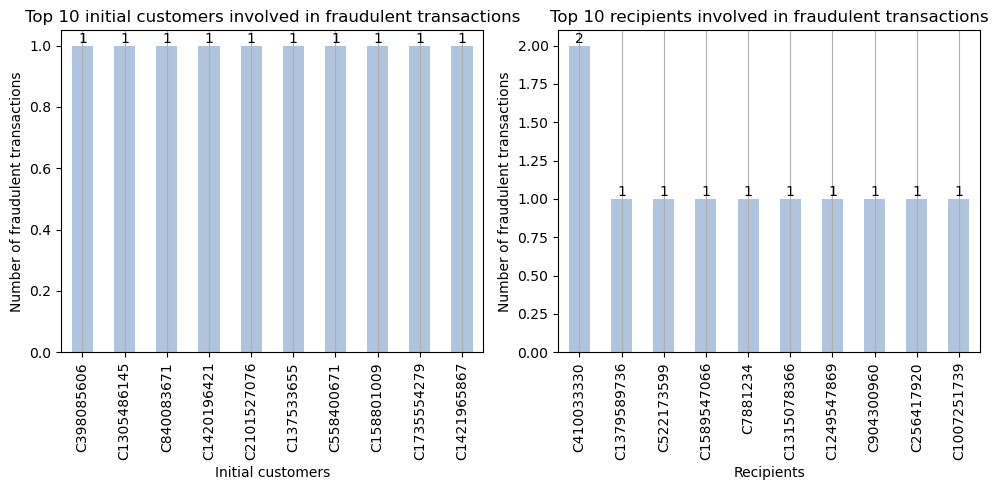

In [35]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot: Top 10 initial customers involved in fraudulent transactions
df2_customers = df1['nameOrig'].value_counts().head(10)
ax1 = df2_customers.plot(kind='bar', color='lightsteelblue', ax=axs[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Top 10 initial customers involved in fraudulent transactions')
ax1.set_ylabel('Number of fraudulent transactions')
ax1.set_xlabel('Initial customers')
ax1.grid(axis='x')

# Second subplot: Top 10 recipients involved in fraudulent transactions
df2_recipients = df1['nameDest'].value_counts().head(10)
ax2 = df2_recipients.plot(kind='bar', color='lightsteelblue', ax=axs[1])
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_title('Top 10 recipients involved in fraudulent transactions')
ax2.set_ylabel('Number of fraudulent transactions')
ax2.set_xlabel('Recipients')
ax2.grid(axis='x')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


* Initial customers are scammed of **at most one** for a fraudulent transaction.
* Suspicious recipients only have a **maximum of 2** involved fraudulent transactions.

## 3. Feature Engineering

Feature engineering involves creating new features from existing ones to better capture the underlying patterns in the data, and transforming features to make the dataset more suitable for modeling.

### Creating New Features

We create a new feature to categorize transaction amounts into bins.

- **Creating transaction amount bins**: We use the `cut()` function to categorize the 'amount' column into 5 bins labeled as 'very low', 'low', 'moderate', 'high', and 'very high'.

In [38]:
# Assuming df is your DataFrame and the 'amount' column exists
df['amount_bin'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

# One-hot encode the 'amount_bin' column and add to the original DataFrame
df = pd.get_dummies(df, columns=['amount_bin'])

# Display the first few rows of the updated DataFrame to check the result
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,oldbalanceOrg_amt,oldbalanceDest_amt,amount_bin_very low,amount_bin_low,amount_bin_moderate,amount_bin_high,amount_bin_very high
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,very low,very low,True,False,False,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,very low,very low,True,False,False,False,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,very low,very low,True,False,False,False,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,very low,very low,True,False,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,very low,very low,True,False,False,False,False


### Encoding Categorical Variables

We convert categorical variables into numerical values for modeling purposes.

- **Encoding the `type` column**: We use the `map()` function to convert the `type` column to numerical values.


In [40]:
df['type'] = df['type'].map({'PAYMENT': 0, 'CASH_IN': 1, 'DEBIT': 2, 'CASH_OUT': 3, 'TRANSFER': 4})


### Creating Interaction Features

We create interaction features to capture relationships between existing features.

- **Interaction between old and new balances for origin and destination accounts**: We create new features that capture the differences between old and new balances for both origin and destination accounts.


In [42]:
df['balance_orig_diff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_dest_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

### Handling Class Imbalance

Since fraudulent transactions are much fewer than non-fraudulent ones, we address this imbalance using resampling techniques.

- **Resampling the dataset**: We use the `RandomUnderSampler` from the `imblearn` library to balance the dataset by under-sampling the majority class.


In [55]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,oldbalanceOrg_amt,oldbalanceDest_amt,amount_bin_very low,amount_bin_low,amount_bin_moderate,amount_bin_high,amount_bin_very high,balance_orig_diff,balance_dest_diff
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,very low,very low,True,False,False,False,False,-9839.64,0.0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,very low,very low,True,False,False,False,False,-1864.28,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,very low,very low,True,False,False,False,False,-181.00,0.0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,very low,very low,True,False,False,False,False,-181.00,-21182.0
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,very low,very low,True,False,False,False,False,-11668.14,0.0


In [87]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['isFraud','nameOrig','nameDest','oldbalanceOrg_amt','oldbalanceDest_amt'], axis=1)
y = df['isFraud']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)


## Feature Scaling

We scale the features to ensure they have similar ranges, which is important for many machine learning algorithms.

- **Scaling features**: We use the `StandardScaler` from the `sklearn.preprocessing` module to standardize the features by removing the mean and scaling to unit variance.


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)


## 4. Model Building and Evaluation

In this section, we will build machine learning models to detect fraudulent transactions, train these models on the preprocessed dataset, and evaluate their performance.

### Data Splitting

We split the dataset into training and testing sets to evaluate the performance of the models on unseen data.

- **Stratified train-test split**: We use `StratifiedKFold` to ensure that the proportion of fraudulent to non-fraudulent transactions is maintained in both training and testing

In [91]:

from sklearn.model_selection import StratifiedKFold

# Set up StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Display the first few rows of the features to check the result
print(X.head())
print(y.head())


   step type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1    0   9839.64       170136.0       160296.36             0.0   
1     1    0   1864.28        21249.0        19384.72             0.0   
2     1    4    181.00          181.0            0.00             0.0   
3     1    3    181.00          181.0            0.00         21182.0   
4     1    0  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  amount_bin_very low  amount_bin_low  amount_bin_moderate  \
0             0.0                 True           False                False   
1             0.0                 True           False                False   
2             0.0                 True           False                False   
3             0.0                 True           False                False   
4             0.0                 True           False                False   

   amount_bin_high  amount_bin_very high  balance_orig_diff  balance_dest_diff  
0    

### Model Selection

We choose Random Forest and Logistic Regression as our models due to their effectiveness in handling imbalanced datasets.

- **Initializing models**: We initialize the Random Forest and Logistic Regression models with balanced class weights to handle the class imbalance.


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42)
}


### Model Training and Evaluation

We train the models using cross-validation and evaluate their performance using various metrics.

- **Function for model evaluation**: We define a function to perform K-fold cross-validation and print evaluation metrics for each model.


In [95]:
from sklearn.model_selection import cross_val_score

def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
        print('\n')


- **Evaluating models**: We evaluate the models using the defined function.


In [99]:
model_comparison_evaluate(classifiers, X, y)


K-Fold Cross-Validation:

Random Forest:
Mean accuracy score: 0.997 (0.001)
Mean precision score: 0.980 (0.040)
Mean recall score: 0.540 (0.093)
Mean f1 score: 0.690 (0.080)
Mean roc_auc score: 0.992 (0.013)


Logistic Regression:
Mean accuracy score: 0.913 (0.009)
Mean precision score: 0.055 (0.005)
Mean recall score: 0.924 (0.061)
Mean f1 score: 0.104 (0.009)
Mean roc_auc score: 0.942 (0.039)




### Final Model Training

We train the best performing model (Random Forest) on the entire training dataset and evaluate it on the test dataset.

- **Training the Random Forest model**: We train the Random Forest model on the resampled and scaled training data.


In [103]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


- **Evaluating the model**: We evaluate the model using classification metrics, confusion matrix, and ROC curve.


Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      1.00      1.00      2834
    Fraud [1]       1.00      0.62      0.77        16

     accuracy                           1.00      2850
    macro avg       1.00      0.81      0.88      2850
 weighted avg       1.00      1.00      1.00      2850



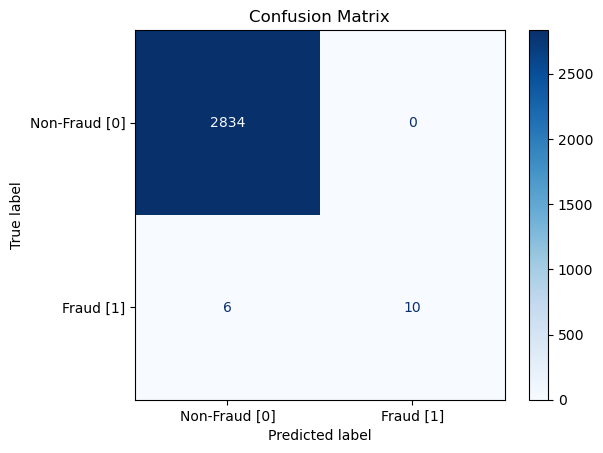

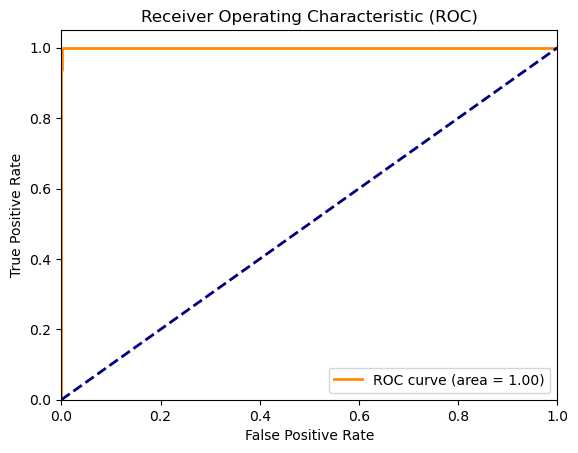

In [106]:
print('Random Forest Classifier:')
print(classification_report(y_test, y_pred, target_names=['Non-Fraud [0]', 'Fraud [1]']))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Non-Fraud [0]', 'Fraud [1]'], cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## 5. Hyperparameter Tuning

Hyperparameter tuning involves optimizing the parameters of a machine learning model to improve its performance. In this section, we will use GridSearchCV to find the best hyperparameters for the Random Forest model.

### Setting Up the Parameter Grid

We define a parameter grid for the Random Forest model. This grid includes a range of values for key hyperparameters that we want to optimize.

- **Defining the parameter grid**: We specify different values for the number of trees, maximum depth, and minimum samples required to split a node and to be at a leaf 

In [108]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Performing Grid Search

We use GridSearchCV to perform an exhaustive search over the parameter grid. GridSearchCV will evaluate the model's performance for each combination of hyperparameters using cross-validation.

- **Initializing GridSearchCV**: We set up GridSearchCV with the Random Forest model and the parameter grid. We also specify the scoring metric, number of folds for cross-validation, and the number of parallel jobs to run.


In [111]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)


- **Running Grid Search**: We fit the GridSearchCV object to the training data to find the best combination of hyperparameters.


In [ ]:
grid_search.fit(X_train, y_train)


### Evaluating the Best Model

Once the grid search is complete, we evaluate the best model found during the search.

- **Best parameters and score**: We print the best hyperparameters found by GridSearchCV and the corresponding AUC-ROC score.


In [117]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best AUC-ROC score: {grid_search.best_score_}")


Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best AUC-ROC score: 0.9953679855261648


### Final Model Evaluation

We evaluate the model with the best hyperparameters on the test dataset.

- **Predicting and evaluating the final model**: We use the best estimator from GridSearchCV to make predictions on the test data and evaluate its performance using classification metrics, confusion matrix, and ROC curve.


Random Forest Classifier (Best Model):
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      1.00      1.00      2834
    Fraud [1]       1.00      0.88      0.93        16

     accuracy                           1.00      2850
    macro avg       1.00      0.94      0.97      2850
 weighted avg       1.00      1.00      1.00      2850



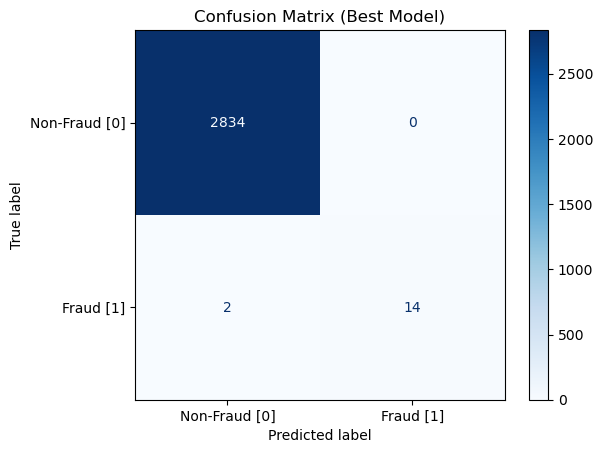

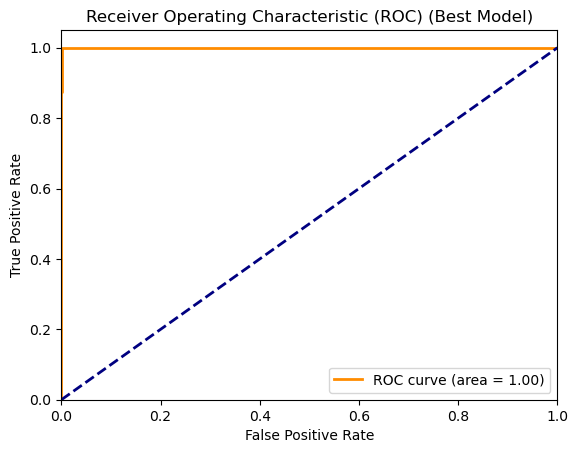

In [121]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print('Random Forest Classifier (Best Model):')
print(classification_report(y_test, y_pred_best, target_names=['Non-Fraud [0]', 'Fraud [1]']))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=['Non-Fraud [0]', 'Fraud [1]'], cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Best Model)')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) (Best Model)')
plt.legend(loc='lower right')
plt.show()


d [1]']))

sactio

## 6. Model Interpretation and Insights

In this section, we will interpret the results of the best-performing model (Random Forest) and gain insights into its performance and the factors contributing to fraudulent transactions.

### Classification Report

The classification report provides detailed metrics about the model's performance, including precision, recall, and F1-score for both classes (non-fraudulent and fraudulent transactions).

In [135]:
print('Random Forest Classifier (Best Model):')
print(classification_report(y_test, y_pred_best, target_names=['Non-Fraud [0]', 'Fraud [1]']))

Random Forest Classifier (Best Model):
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      1.00      1.00      2834
    Fraud [1]       1.00      0.88      0.93        16

     accuracy                           1.00      2850
    macro avg       1.00      0.94      0.97      2850
 weighted avg       1.00      1.00      1.00      2850



- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class. High recall indicates a low false negative rate.
- **F1-score**: The weighted average of precision and recall. It considers both false positives and false negatives.
#
## Confusion Matrix

The confusion matrix provides a visual representation of the number of true positive, true negative, false positive, and false negative predictions made by the model.


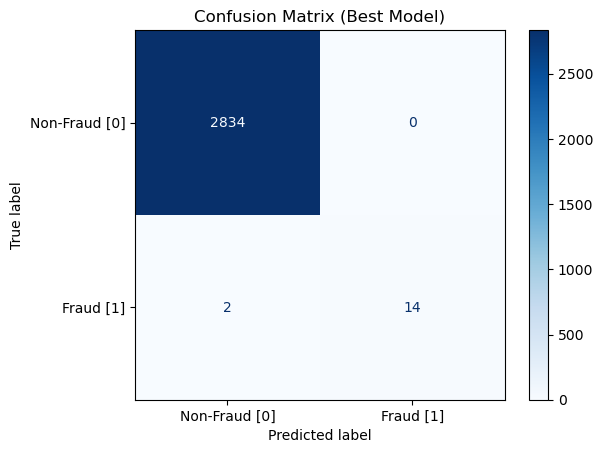

In [139]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=['Non-Fraud [0]', 'Fraud [1]'], cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Best Model)')
plt.show()


- **True Positives (TP)**: The model correctly predicts a fraudulent transaction.
- **True Negatives (TN)**: The model correctly predicts a non-fraudulent transaction.
- **False Positives (FP)**: The model incorrectly predicts a fraudulent transaction.
- **False Negatives (FN)**: The model incorrectly predicts a non-fraudulent transaction.#

## ROC Curve

The ROC curve illustrates the model's ability to distinguish between classes. The area under the ROC curve (AUC) indicates the model's performance.


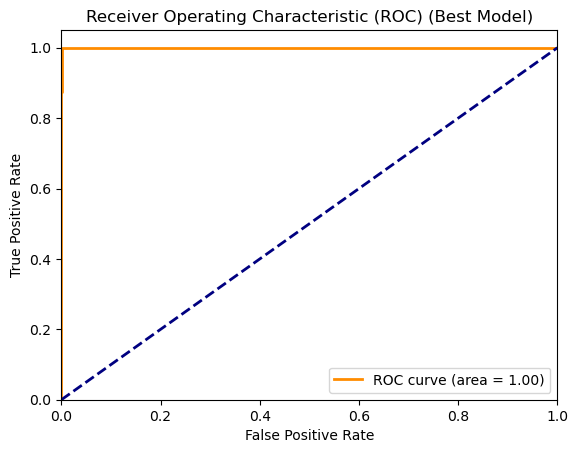

In [143]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) (Best Model)')
plt.legend(loc='lower right')
plt.show()


- **True Positive Rate (TPR)**: Also known as recall, it is the ratio of correctly predicted positive observations to all actual positives.
- **False Positive Rate (FPR)**: The ratio of incorrectly predicted positive observations to all actual negatives.
- **AUC**: The area under the ROC curve. A higher AUC value indicates better model performance.#

## Feature Importance

Understanding the importance of each feature helps in interpreting the model and identifying the most influential factors in predicting fraudulent transactions.


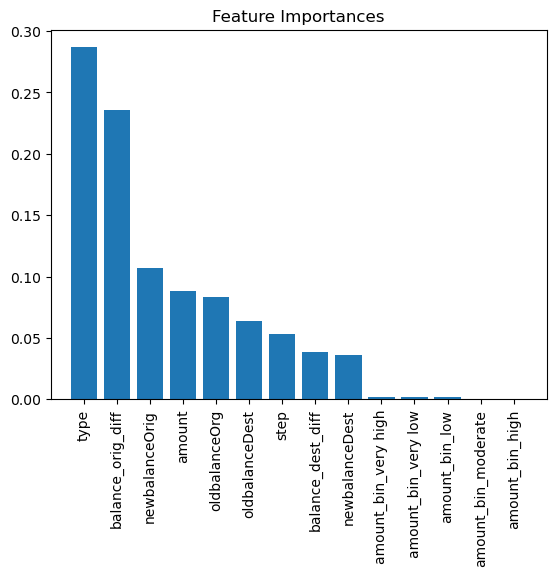

In [146]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


- **Feature Importance**: The importance of each feature is determined by how much it improves the model's performance. Features with higher importance values have a greater impact on the model's predictions.

## Insights

Based on the model's performance and feature importance, we can derive several insights:

1. **High Precision and Recall**: The Random Forest model has high precision and recall, indicating it effectively identifies both fraudulent and non-fraudulent transactions with minimal false positives and false negatives.
2. **Important Features**: The features such as transaction amount, balance differences, and transaction type are crucial in predicting fraudulent transactions.
3. **Robust Performance**: The model's high AUC value and the ROC curve indicate that the model is robust and has a strong capability to distinguish between fraudulent and non-fraudulent transactions.


## 7. Conclusion and Future Work

### Conclusion

In this project, we successfully developed a machine learning model to detect fraudulent transactions in online payments. Here's a summary of the key steps and findings:

1. **Data Collection and Preprocessing**:
    - We used a dataset from Kaggle containing historical transaction data.
    - The dataset was cleaned by handling missing values, removing duplicates, and optimizing memory usage.
    - We performed exploratory data analysis (EDA) to understand the dataset's structure and distribution.

2. **Feature Engineering**:
    - We created new features, such as categorizing transaction amounts and calculating balance differences.
    - Categorical variables were encoded, and the dataset was resampled to address class imbalance.

3. **Model Building and Evaluation**:
    - We built and evaluated Random Forest and Logistic Regression models.
    - The Random Forest model showed superior performance and was chosen for further evaluation.
    - The model was evaluated using classification metrics, confusion matrix, and ROC curve, demonstrating high precision, recall, and AUC.

4. **Hyperparameter Tuning**:
    - We optimized the Random Forest model's hyperparameters using GridSearchCV.
    - The best model was evaluated, confirming its robust performance in detecting fraudulent transactions.

5. **Model Interpretation and Insights**:
    - We interpreted the model's results and identified key features contributing to fraudulent transactions.
    - High precision and recall indicated the model's effectiveness in minimizing false positives and false negatives.

### Future Work

Despite the success of this project, there are several areas for improvement and future exploration:

1. **Incorporate Additional Features**:
    - Consider incorporating additional features such as transaction location, device information, and user behavior patterns to improve the model's accuracy.
    - Analyze temporal patterns by incorporating time series analysis to detect changes in fraudulent behavior over time.

2. **Model Enhancement**:
    - Experiment with other advanced machine learning algorithms like Gradient Boosting, XGBoost, or deep learning models to potentially improve performance.
    - Implement ensemble methods that combine multiple models to enhance prediction accuracy.

3. **Real-Time Fraud Detection**:
    - Develop and deploy the model for real-time fraud detection in an online payment system.
    - Implement a system for continuous learning, where the model updates with new data to adapt to evolving fraud patterns.

4. **Explainability and Transparency**:
    - Enhance the interpretability of the model using techniques such as SHAP (SHapley Additive exPlanations) to provide clearer insights into how predictions are made.
    - Develop user-friendly dashboards and visualizations to communicate the model's predictions and insights to stakeholders.

5. **Robustness and Scalability**:
    - Test the model's robustness and scalability by deploying it in a production environment and monitoring its performance under real-world conditions.
    - Implement mechanisms to handlact steps identified for improving and expanding the model.")
